# **Siddharth Narayanan**
## **Data Science and Business Analytics Intern @ The Sparks Foundation**
## **Task 1** : Prediction using Supervised ML

### **Objective**: To predict the percentage of marks that a student is expected to score based upon the number of hours studied using simple linear regression method for two variables.

### **Importing Libraries**

In [ ]:
#Importing all the required libraries for this task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Reading the Data From URL**

In [ ]:
# Reading data from the provided link

url = "http://bit.ly/w-data"
my_data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


### **Exploring the Data**

In [ ]:
# Displaying the number of rows and columns along with data types
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Checking for null values in the dataset
my_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Descriptive Statistics for the given dataset
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Displaying all entries of the given dataset
my_data.head(30)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


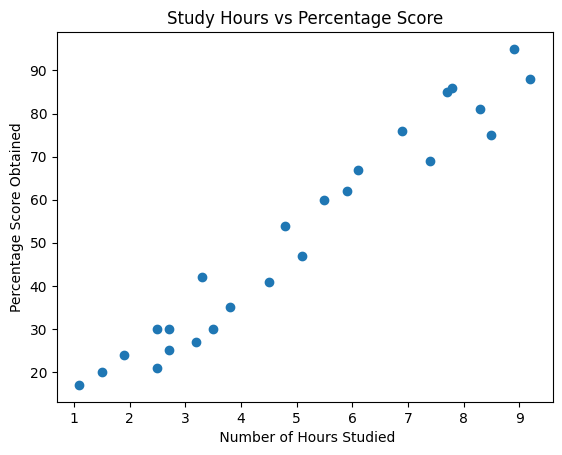

In [ ]:
# Visualizing distibution of scores and checking for a linear relationship
x=my_data.Hours
y=my_data.Scores
plt.scatter(x, y)
plt.title('Study Hours vs Percentage Score')
plt.xlabel(' Number of Hours Studied')
plt.ylabel('Percentage Score Obtained')
plt.show()

From the graph above, we can clearly observe a positive linear relationship between the number of hours studied and percentage score obtained by students.

In [ ]:
# Validating linear relationship
my_data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


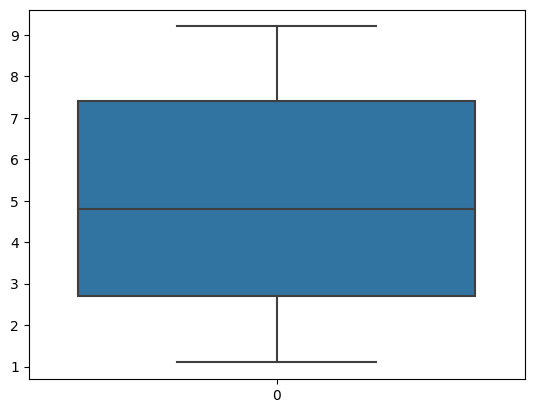

In [ ]:
sns.boxplot(my_data['Hours']) # Checking for any outliers in the Hours column


<Axes: >

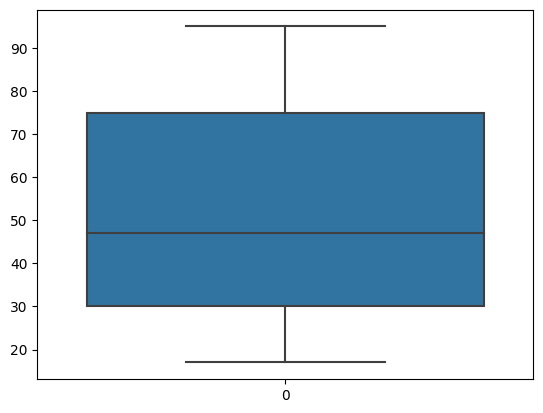

In [ ]:
sns.boxplot(my_data['Scores']) # Checking for any outliers in the Scores column


Box plots show that the variables are in a particular range and therefore, no outliers are present in the given data.

### **Linear Regression**

Now, we will divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
# Data Preparation
x = my_data.iloc[:, :-1].values #Independent variable i.e Hours
y = my_data.iloc[:, 1].values # Dependent Variable i.e Scores


The next step is to divide this data into training and test sets using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
random_state=0)




### **Training the Algorithm**

After splitting the data into training and testing sets, now it's the time to train the algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(x_train,y_train)
print("Algorithm Training Complete")

Algorithm Training Complete


In [ ]:
# Plotting the regression line
line = my_model.coef_*x + my_model.intercept_

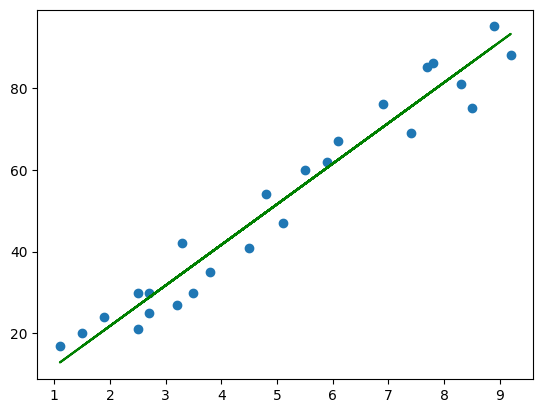

In [ ]:
# Plotting for test data
plt.scatter(x, y)
plt.plot(x, line, color="green")
plt.show()

### **Making Predictions**

In [ ]:
print(x_test) # Testing data - In Hours
y_pred = list(my_model.predict(x_test)) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual Vs Predicted value
prediction =pd.DataFrame({'Target':y_test,'Predicted':y_pred})
prediction


,Target,Predicted
0,20,[16.884144762398023]
1,27,[33.732260779489835]
2,69,[75.35701799818725]
3,30,[26.79480124304026]
4,62,[60.491033277223885]


**Next, we will predict the score obtained if a student studies for 9.25 hours/day.**

In [ ]:
study_hours = 9.25
own_pred = my_model.predict([[study_hours]])
print("No of Hours =", study_hours)
print("Predicted Score=",own_pred[0])


No of Hours = 9.25
Predicted Score= 93.69173248737539


### **Evaluating the Model**

Finally, we will evaluate the performance of the algorithm using the mean square error.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


**Mean Absolute Error is a measure of how accurate the model is in predicting scores for given number of study hours.**